In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
import math
import numpy as np
import statsmodels as sm
from statsmodels.stats import diagnostic as dia
from datetime import datetime
from matplotlib.pyplot import figure
from numpy import linalg as LA

In [2]:
# Read in data
alc_df = pd.read_excel("Alcohol Beverage Sales - monthly.xls", skiprows=10)
cpiFoodBev_df = pd.read_excel("CPI Food and Beverages.xls", skiprows=10)
cpiTob_df = pd.read_excel("CPI Tobacco Consumption.xls", skiprows=10)
income_df = pd.read_excel("Disposable personal income - monthly.xls", skiprows=10)
urate_df = pd.read_excel("Unemployment Rate - monthly.xls", skiprows=10)

In [3]:
# Rename columns
alc_df.rename(columns={'observation_date':'date', 'S4248SM144NCEN':'value'}, inplace=True)
cpiFoodBev_df.rename(columns={'observation_date':'date', 'CPIFABNS':'value'}, inplace=True)
cpiTob_df.rename(columns={'observation_date':'date', 'CUUR0000SEGA':'value'}, inplace=True)
income_df.rename(columns={'observation_date':'date', 'DSPI':'value'}, inplace=True)
urate_df.rename(columns={'observation_date':'date', 'UNRATE':'value'}, inplace=True)

In [4]:
# set Date index
alc_df.set_index('date', inplace=True)
cpiFoodBev_df.set_index('date', inplace=True)
cpiTob_df.set_index('date', inplace=True)
income_df.set_index('date', inplace=True)
urate_df.set_index('date', inplace=True)

In [119]:
# train
start = datetime(1992,1,1)
start
end = datetime(2017,12,31)
end
# test
end_test = datetime(2018,12,31)

In [120]:
# prepare data
alcTrain = alc_df.loc[start:end, 'value'].values
cpiFoodBevTrain = cpiFoodBev_df.loc[start:end, 'value'].values
cpiTobTrain = cpiTob_df.loc[start:end, 'value'].values
incomeTrain = income_df.loc[start:end, 'value'].values
urateTrain = urate_df.loc[start:end, 'value'].values

In [121]:
# Construct Date Vector
timeVector = pd.DataFrame({'timeVector':(np.linspace(1992,2018,num=len(alcTrain))).tolist()})
# Timevec test
timeVector_test = pd.DataFrame({'timeVector':(np.linspace(2018,2019,12)).tolist()})

#### Plot data

Text(0.5, 1.0, 'Alcohol Beverage Sales')

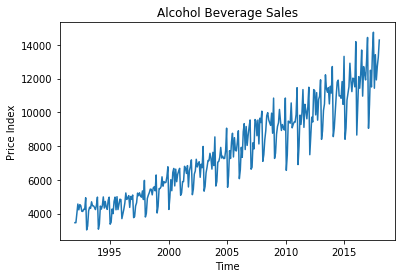

In [122]:
plt.plot(timeVector,alcTrain)
plt.xlabel('Time')
plt.ylabel('Price Index')
plt.title('Alcohol Beverage Sales')

Text(0.5, 1.0, 'CPI Food and Beverages')

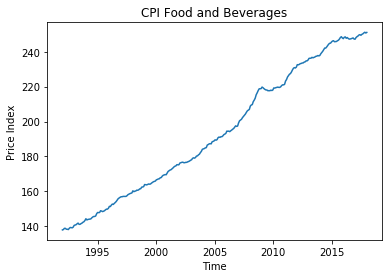

In [123]:
plt.plot(timeVector,cpiFoodBevTrain)
plt.xlabel('Time')
plt.ylabel('Price Index')
plt.title('CPI Food and Beverages')

Text(0.5, 1.0, 'CPI Tobacco Consumption')

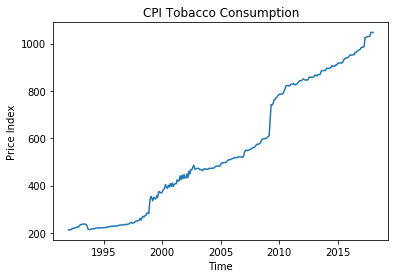

In [124]:
plt.plot(timeVector,cpiTobTrain)
plt.xlabel('Time')
plt.ylabel('Price Index')
plt.title('CPI Tobacco Consumption')

Text(0.5, 1.0, 'Disposable personal income')

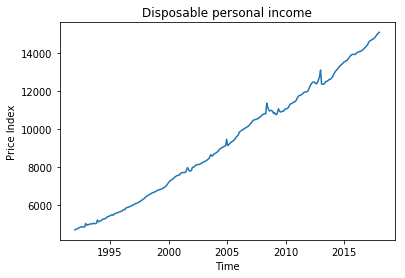

In [125]:
plt.plot(timeVector,incomeTrain)
plt.xlabel('Time')
plt.ylabel('Price Index')
plt.title('Disposable personal income')

Text(0.5, 1.0, 'Unemployment Rate')

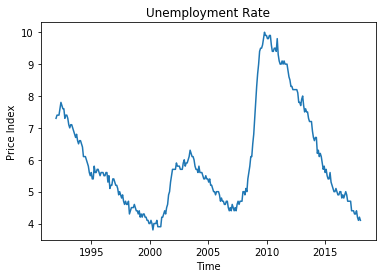

In [126]:
plt.plot(timeVector,urateTrain)
plt.xlabel('Time')
plt.ylabel('Price Index')
plt.title('Unemployment Rate')

In [127]:
from scipy import stats

In [128]:
stats.describe(alcTrain)

DescribeResult(nobs=312, minmax=(3031, 14740), mean=7680.61217948718, variance=7660210.611169511, skewness=0.36909741149380026, kurtosis=-0.8529051220520061)

In [129]:
stats.describe(cpiTobTrain)

DescribeResult(nobs=312, minmax=(212.6, 1048.219), mean=550.6957371794872, variance=71290.64390691463, skewness=0.2996196212533212, kurtosis=-1.3102007252867474)

In [130]:
stats.describe(cpiFoodBevTrain)

DescribeResult(nobs=312, minmax=(137.9, 251.13), mean=193.26098397435896, variance=1322.0168873920252, skewness=0.12627622302365815, kurtosis=-1.3606366181071257)

In [131]:
stats.describe(incomeTrain)

DescribeResult(nobs=312, minmax=(4681.1, 15083.7), mean=9336.971153846154, variance=9276688.5056604, skewness=0.13699098381852523, kurtosis=-1.2133071426137216)

In [132]:
stats.describe(urateTrain)

DescribeResult(nobs=312, minmax=(3.8, 10.0), mean=5.969551282051282, variance=2.5489412771044604, skewness=0.9470718140123681, kurtosis=-0.07076368716701698)

### Advanced Dicky Fueller test

In [133]:
pValue1 = ts.adfuller(alcTrain,1,regression='ct')[1]
pValue1

1.442767619022653e-22

In [134]:
pValue2 = ts.adfuller(cpiFoodBevTrain,1,regression='ct')[1]
pValue2

0.702472650999711

In [135]:
pValue3 = ts.adfuller(cpiTobTrain,1,regression='ct')[1]
pValue3

0.5190379691864911

In [136]:
pValue4 = ts.adfuller(incomeTrain,1,regression='ct')[1]
pValue4

0.21040011050122365

In [137]:
pValue5 = ts.adfuller(urateTrain,1,regression='ct')[1]
pValue5

0.9653349997491704

### Take first log difference

In [138]:
alcTrain = np.log(alcTrain[1:]/alcTrain[:-1])
cpiFoodBevTrain = np.log(cpiFoodBevTrain[1:]/cpiFoodBevTrain[:-1])
cpiTobTrain = np.log(cpiTobTrain[1:]/cpiTobTrain[:-1])
incomeTrain = np.log(incomeTrain[1:]/incomeTrain[:-1])
# do not first differentuate urate -> already growth

In [139]:
# Adjust timeVec and urate
timeVector = timeVector[1:]
urateTrain = urateTrain[1:]

## Estimate benchmark: ARMA(1,1) model

In [140]:
p=1
q=1
d=0
model = sm.tsa.arima_model.ARIMA(alcTrain,(p,d,q))

In [141]:
result = model.fit(transparams=False, trend='c')

In [142]:
result.bic

-409.21122534220206

In [143]:
result.aic

-424.170396990919

Text(0.5, 1.0, 'Actual vs ARMA(1,1)')

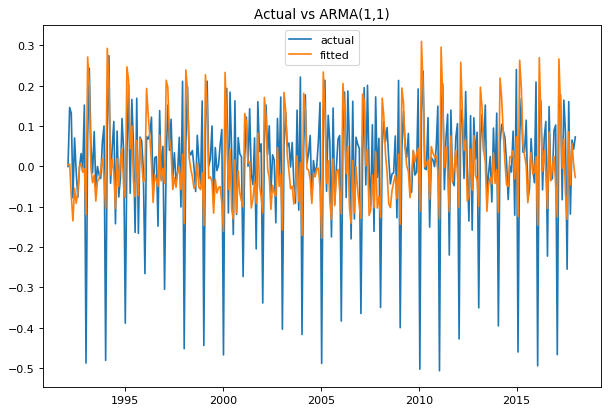

In [144]:
yHat = result.fittedvalues
eHat = alcTrain - yHat # residuals

figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(timeVector, np.array([alcTrain, yHat]).T)
plt.legend(['actual', 'fitted'])
plt.title('Actual vs ARMA(1,1)')

In [145]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 -409.2112
Dependent Variable: y                Log-Likelihood:      216.09   
Date:               2019-03-11 07:27 Scale:               1.0000   
No. Observations:   311              Method:              css-mle  
Df Model:           3                Sample:              0        
Df Residuals:       308                                   1        
Converged:          1.0000           S.D. of innovations: 0.120    
No. Iterations:     29.0000          HQIC:                -418.191 
AIC:                -424.1704                                      
---------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const       0.0039     0.0003    15.1860   0.0000    0.0034    0.0044
ar.L1.y     0.1462     0.0582     2.5130   0.0125    0.0322    0.2602
ma.L1.y    -0.9722     0.0140   -69.3207   0.0000   -0.9997   -0.9447
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           6.8409             0.0000           6.8409             0.0000
MA.1           1.0286             0.0000           1.0286             0.0000
===================================================================

"""

We can see how the ARMA(1,1) is a strong benchmark. It gives us a signifcant predictor, namely the lag of alchool consumption, and a significant intercept. We will try other different predictors togehter with the ARMA benchmark to improve our performances

In [146]:
# analyze residuals
acf = ts.acf(eHat)

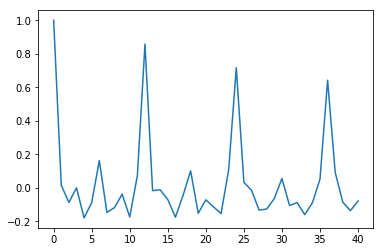

In [147]:
plt.plot(acf)

We can already see that the residuals are not uncorrelated THis hints that the model could be improved as there should be some omitted variables.
Next, we'll cmpute the LBQ test to formally test for residuals autocorrelation

In [148]:
def box_pierce_test(eHat,lag):
    X_squared = dia.acorr_ljungbox(eHat,lag,boxpierce=True)[2][-1]
    p_values = dia.acorr_ljungbox(eHat,lag,boxpierce=True)[3][-1]
    return X_squared, p_values

In [149]:
box_pierce_test(eHat, 12)

(274.1479367360045, 1.2335047050368464e-51)

We can now confirm our hypotesis that the residuals are not uncorrelated. Indeed, the p-value is almost equal to zero. This signals that there is almost a zero chance that we observed the eHat given that the null is true. In the LBQ the null hypotesis affirms that the data are independently distributed. Therefore, we can conclude that the reisudals "eHAt" are NOT uncorrelated

### Try different combinations of ARIMA

### We do this once, it will take approx 20 minutes to run. Change the type of cell from Raw to Code in order to run

### ARMA(12,5)

In [150]:
p = 12
d = 0
q = 5

result0 = sm.tsa.arima_model.ARIMA(alcTrain, (p,d,q)).fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [151]:
result0.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 -996.2985
Dependent Variable: y                Log-Likelihood:      552.68   
Date:               2019-03-11 07:28 Scale:               1.0000   
No. Observations:   311              Method:              css-mle  
Df Model:           18               Sample:              0        
Df Residuals:       293                                   1        
Converged:          0.0000           S.D. of innovations: 0.039    
No. Iterations:     500.0000         HQIC:                -1038.952
AIC:                -1067.3545                                     
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const        0.0034     0.0005    6.7812   0.0000    0.0024    0.0044
ar.L1.y     -0.2885     0.0726   -3.9754   0.0001   -0.4307   -0.1462
ar.L2.y     -0.2346     0.0762   -3.0786   0.0023   -0.3840   -0.0852
ar.L3.y     -0.3147     0.0688   -4.5767   0.0000   -0.4494   -0.1799
ar.L4.y     -0.2721     0.0706   -3.8528   0.0001   -0.4105   -0.1337
ar.L5.y     -0.2859     0.0735   -3.8917   0.0001   -0.4299   -0.1419
ar.L6.y     -0.2586     0.0714   -3.6241   0.0003   -0.3985   -0.1188
ar.L7.y     -0.3248     0.0703   -4.6193   0.0000   -0.4626   -0.1870
ar.L8.y     -0.2488     0.0722   -3.4471   0.0006   -0.3903   -0.1073
ar.L9.y     -0.2711     0.0711   -3.8113   0.0002   -0.4105   -0.1317
ar.L10.y    -0.3314     0.0697   -4.7540   0.0000   -0.4680   -0.1948
ar.L11.y    -0.2032     0.0738   -2.7554   0.0062   -0.3478   -0.0587
ar.L12.y     0.6553     0.0688    9.5203   0.0000    0.5204    0.7902
ma.L1.y     -0.7567     0.0814   -9.2949   0.0000   -0.9162   -0.5971
ma.L2.y      0.0140     0.0652    0.2141   0.8306   -0.1138    0.1417
ma.L3.y      0.5419     0.0735    7.3682   0.0000    0.3978    0.6861
ma.L4.y     -0.4942     0.0673   -7.3446   0.0000   -0.6260   -0.3623
ma.L5.y      0.4607     0.0755    6.1020   0.0000    0.3127    0.6087
---------------------------------------------------------------------------
                  Real          Imaginary         Modulus         Frequency
---------------------------------------------------------------------------
AR.1            -1.0002           -0.0000          1.0002           -0.5000
AR.2            -0.8931           -0.5002          1.0236           -0.4187
AR.3            -0.8931            0.5002          1.0236            0.4187
AR.4            -0.5232           -0.8645          1.0105           -0.3366
AR.5            -0.5232            0.8645          1.0105            0.3366
AR.6             0.0002           -1.0039          1.0039           -0.2500
AR.7             0.0002            1.0039          1.0039            0.2500
AR.8             0.5015           -0.8680          1.0024           -0.1666
AR.9             0.5015            0.8680          1.0024            0.1666
AR.10            0.8665           -0.5003          1.0005           -0.0833
AR.11            0.8665            0.5003          1.0005            0.0833
AR.12            1.4065           -0.0000          1.4065           -0.0000
MA.1            -1.0490           -0.0000          1.0490           -0.5000
MA.2             0.9336           -0.5683          1.0930           -0.0870
MA.3             0.9336            0.5683          1.0930            0.0870
MA.4             0.1272           -1.3100          1.3161           -0.2346
MA.5             0.1272            1.3100          1.3161            0.2346
===================================================================

"""

Text(0.5, 1.0, 'Actual vs ARMA(12,5)')

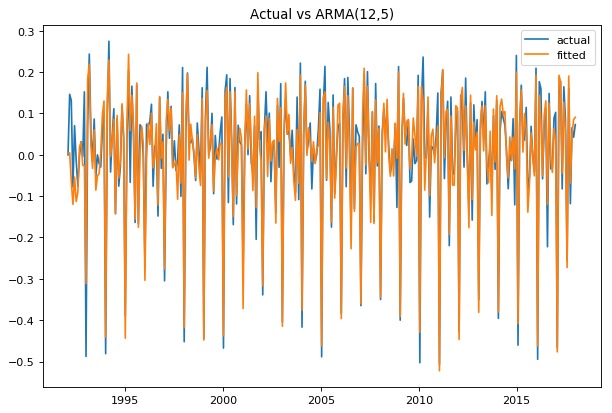

In [152]:
fitted = result0.fittedvalues
eHat = alcTrain - fitted

figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(timeVector, np.array([alcTrain, fitted]).T)
plt.legend(['actual', 'fitted'])
plt.title('Actual vs ARMA(12,5)')

Text(0.5, 1.0, 'Residuals Autocorrelation')

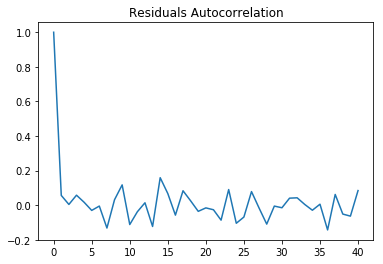

In [153]:
plt.plot(ts.acf(eHat))
plt.title('Residuals Autocorrelation')

In [154]:
box_pierce_test(eHat, 12)

(16.867723734789255, 0.15464121778345882)

## Seasonal Dummies

- In the following section we'll try to improve our forecast by removing seasonality, if present. Indeed, we can observe from the plot that the trend presents some seasonal aspects. If this is true, we could caputre those effects by introducing dummy variables in our regression

In [155]:
s = pd.Series(list('bcdefghilmn'+'abcdefghilmn'*24+'abcdefghilm'))

In [156]:
D = pd.get_dummies(s)

In [157]:
D['alc_lag'] = list(alcTrain[:-1])

In [158]:
y = list(alcTrain[1:])
result1 = sm.regression.linear_model.OLS(y, D).fit()

In [159]:
result1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.878    
Dependent Variable: y                AIC:                -906.7188
Date:               2019-03-11 07:28 BIC:                -858.1434
No. Observations:   310              Log-Likelihood:     466.36   
Df Model:           12               F-statistic:        186.3    
Df Residuals:       297              Prob (F-statistic): 2.13e-130
R-squared:          0.883            Scale:              0.0030160
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
a         -0.1661     0.0220    -7.5348   0.0000   -0.2095   -0.1227
b          0.2166     0.0114    19.0594   0.0000    0.1942    0.2389
c          0.1041     0.0133     7.8047   0.0000    0.0778    0.1303
d          0.0897     0.0108     8.3322   0.0000    0.0685    0.1109
e          0.0945     0.0115     8.2035   0.0000    0.0718    0.1172
f         -0.0655     0.0109    -5.9859   0.0000   -0.0870   -0.0440
g         -0.0056     0.0116    -0.4823   0.6300   -0.0283    0.0172
h         -0.0347     0.0110    -3.1552   0.0018   -0.0564   -0.0131
i          0.0134     0.0112     1.1967   0.2324   -0.0086    0.0353
l          0.0361     0.0110     3.2678   0.0012    0.0143    0.0578
m          0.1232     0.0108    11.4334   0.0000    0.1020    0.1444
n         -0.3395     0.0124   -27.4814   0.0000   -0.3638   -0.3152
alc_lag   -0.5996     0.0463   -12.9411   0.0000   -0.6908   -0.5084
------------------------------------------------------------------
Omnibus:               21.890       Durbin-Watson:          2.878 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       10.189
Skew:                  -0.229       Prob(JB):               0.006 
Kurtosis:              2.239        Condition No.:          5     
==================================================================

"""

In [160]:
result1.bic

-858.1433893264254

In [161]:
result1.aic

-906.718829193655

Text(0.5, 1.0, 'Actual vs Seasonal Dummies+First_lag')

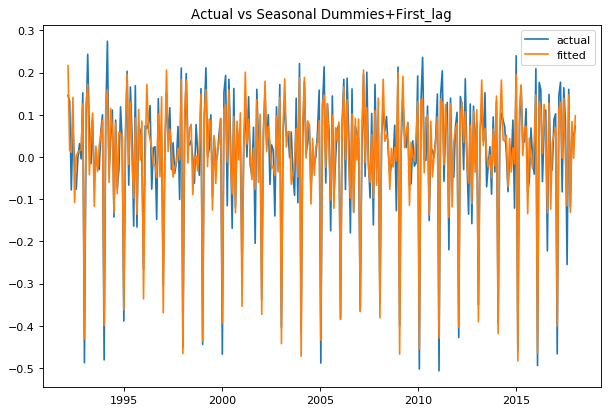

In [162]:
yHat_D = result1.fittedvalues
eHat_D = y - yHat_D

figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(timeVector[1:], np.array([y, yHat_D]).T)
plt.legend(['actual', 'fitted'])
plt.title('Actual vs Seasonal Dummies+First_lag')

#### Analyze residuals properties
- Autocorrelation

In [163]:
acf_D = ts.acf(eHat_D)

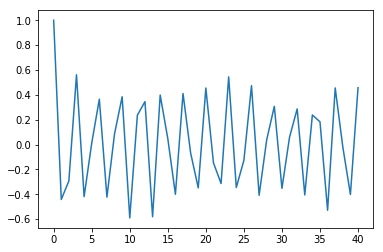

In [164]:
plt.plot(acf_D)

In [165]:
box_pierce_test(eHat_D, 12)

(546.430105068055, 2.8545897202084792e-109)

# VAR with other predictors

In [166]:
from statsmodels.tsa.api import VAR

In [167]:
y=pd.DataFrame(list(alcTrain[:-1]), columns={'Alcohol'} ).reset_index(drop=True)
a=pd.DataFrame(list(cpiFoodBevTrain[:-1]), columns={'CPIfood'} ).reset_index(drop=True)
b=pd.DataFrame(list(cpiTobTrain[:-1]), columns={'CPItobacco'}).reset_index(drop=True)
c=pd.DataFrame(list(incomeTrain[:-1]), columns={'income'}).reset_index(drop=True)
d=pd.DataFrame(list(urateTrain[:-1]), columns={'unemployment'}).reset_index(drop=True)

In [168]:
Y = pd.concat([y,a,b,c,d],axis=1)

In [169]:
modelVar = VAR(Y)

In [170]:
resultVar = modelVar.fit(maxlags=1)

In [171]:
resultVar.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Mar, 2019
Time:                     07:28:59
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -37.2010
Nobs:                     309.000    HQIC:                  -37.4185
Log likelihood:           3641.29    FPE:                4.85759e-17
AIC:                     -37.5634    Det(Omega_mle):     4.41226e-17
--------------------------------------------------------------------
Results for equation Alcohol
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.056701         0.034178            1.659           0.097
L1.Alcohol             -0.422805         0.057524           -7.350           0.000
L1.CPIfood            -10.623385         3.703761 

In [172]:
resultVar2 = modelVar.fit(maxlags=2)

In [173]:
resultVar2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Mar, 2019
Time:                     07:28:59
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -37.0299
Nobs:                     308.000    HQIC:                  -37.4296
Log likelihood:           3675.01    FPE:                4.25526e-17
AIC:                     -37.6959    Det(Omega_mle):     3.57048e-17
--------------------------------------------------------------------
Results for equation Alcohol
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.035895         0.033777            1.063           0.288
L1.Alcohol             -0.528005         0.057582           -9.170           0.000
L1.CPIfood            -12.234108         3.521699 

## Forecasting

In [174]:
# prepare test series
# we will use the alcTest to compute the oos RMSE
alcTest = alc_df.loc[datetime(2017,12,1):end_test, 'value'].values
alcTest = np.log(alcTest[1:]/alcTest[:-1])

# cpiFoodBevTest = cpiFoodBev_df.loc[end:end_test, 'value'].values
# cpiTobTest = cpiTob_df.loc[end:end_test, 'value'].values
# incomeTest = income_df.loc[end:end_test, 'value'].values
# urateTest = urate_df.loc[end:end_test, 'value'].values

## VAR(1)

### Impulse response

In [175]:
YpreImp = pd.DataFrame(resultVar.forecast(Y.values, steps=12))  # 1 year forecast

In [176]:
# impulse response function
irf = resultVar.irf(12)
impulse = pd.DataFrame(irf.irfs[:,:,1])

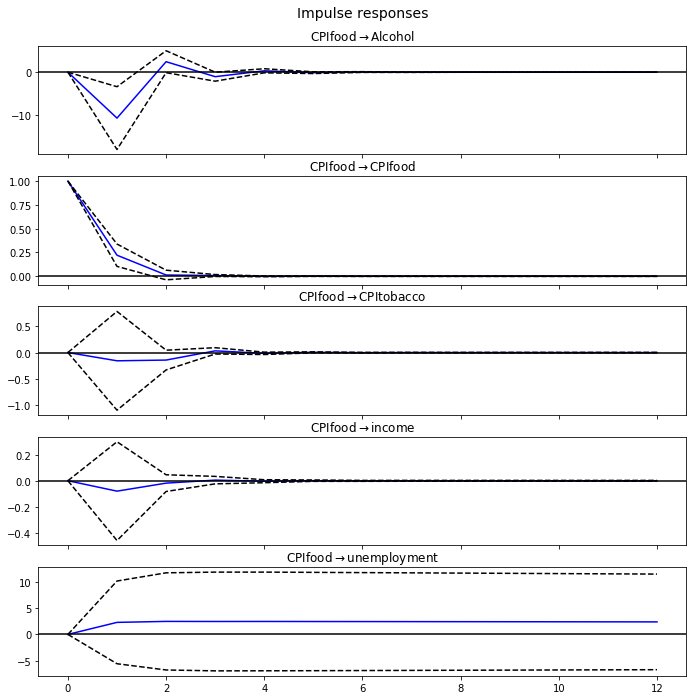

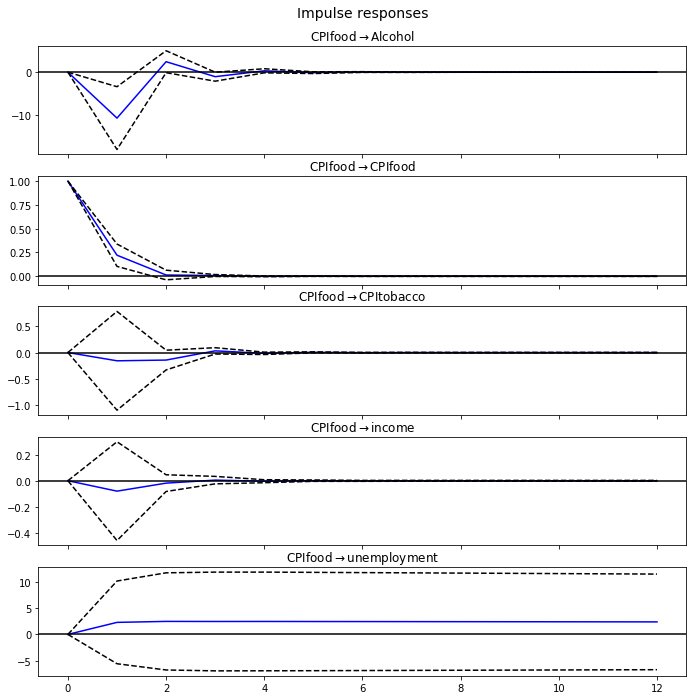

In [177]:
irf.plot(impulse='CPIfood')

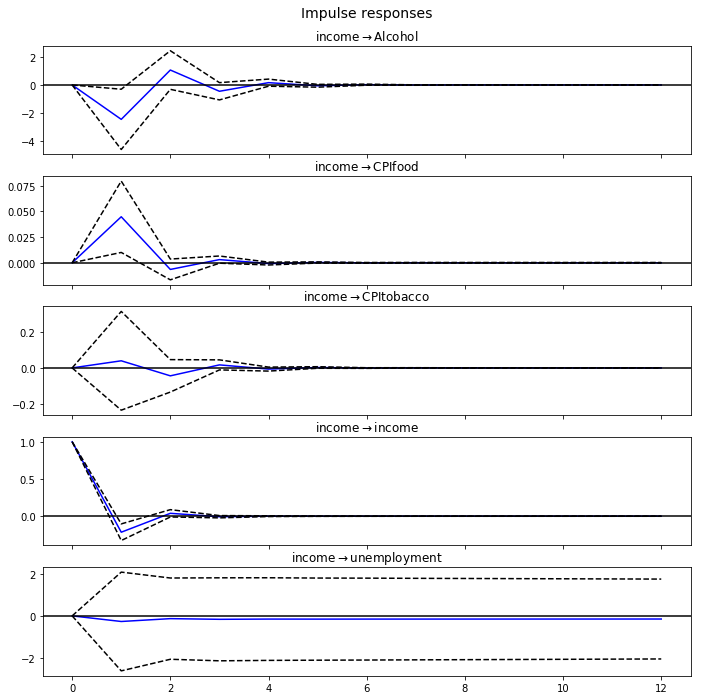

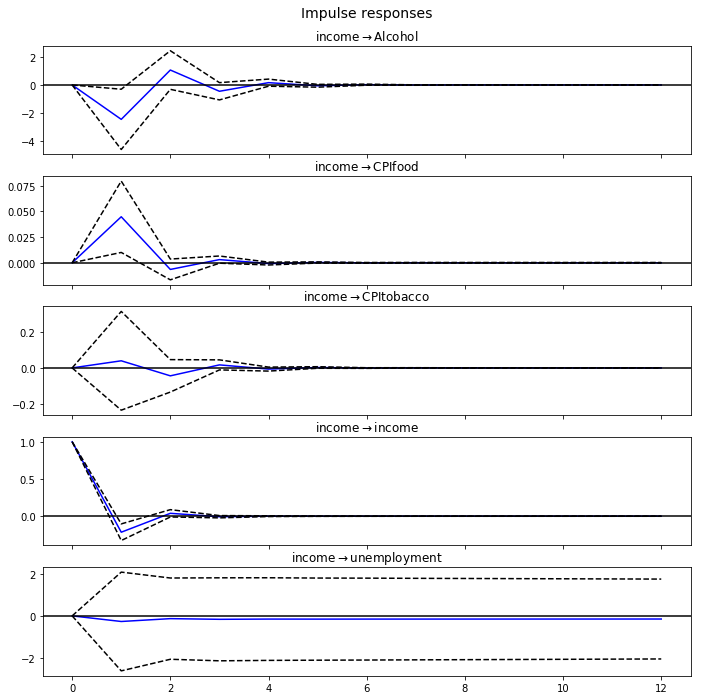

In [178]:
irf.plot(impulse='income')

In [179]:
fcVAR = YpreImp[0]

In [180]:
# VAR RMSE
rmseVAR = np.sqrt(np.mean(sum((fcVAR-alcTest)**2)))

In [181]:
rmseVAR

0.5841087553178538

Text(0.5, 1.0, 'actual VS VAR')

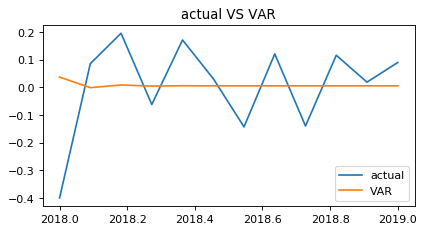

In [182]:
figure(figsize=(6,3),dpi=80)
plt.plot(timeVector_test, np.array([alcTest, YpreImp[0]]).T)
plt.legend(['actual','VAR'])
plt.title('actual VS VAR')

## VAR(2)

In [183]:
fcVAR2 = pd.DataFrame(resultVar2.forecast(Y.values, steps=12))  # 1 year forecast

Text(0.5, 1.0, 'actual VS VAR(2)')

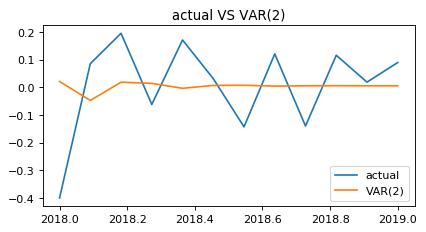

In [185]:
figure(figsize=(6,3),dpi=80)
plt.plot(timeVector_test, np.array([alcTest, fcVAR2[0]]).T)
plt.legend(['actual','VAR(2)'])
plt.title('actual VS VAR(2)')

## ARMA(1, 1)

In [186]:
fc = result.forecast(steps=12)

Text(0.5, 1.0, 'actual VS ARMA(1,1)')

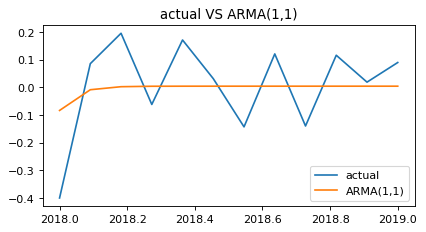

In [187]:
figure(figsize=(6,3),dpi=80)
plt.plot(timeVector_test, np.array([alcTest, fc[0]]).T)
plt.legend(['actual','ARMA(1,1)'])
plt.title('actual VS ARMA(1,1)')

In [188]:
rmseARMA11 = np.sqrt(np.mean(sum((fc[0]-alcTest)**2)))

In [189]:
rmseARMA11

0.5047612937403917

## ARMA(12, 5)

In [190]:
fcnew = result0.forecast(steps=12)

Text(0.5, 1.0, 'actual VS ARMA(12,5)')

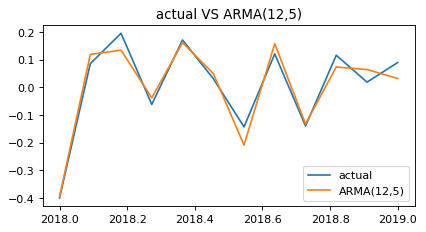

In [191]:
figure(figsize=(6,3),dpi=80)
plt.plot(timeVector_test, np.array([alcTest, fcnew[0]]).T)
plt.legend(['actual','ARMA(12,5)'])
plt.title('actual VS ARMA(12,5)')

In [192]:
fcAR125 = fcnew[0]

In [193]:
rmseARMA125 = np.sqrt(np.mean(np.sum((fcAR125-alcTest)**2)))

In [194]:
rmseARMA125

0.13725568892493425

In [195]:
# confidence intervals
up, down = zip(*fcnew[2])

Text(0.5, 1.0, 'ARMA(12,5) Forecast Intervals')

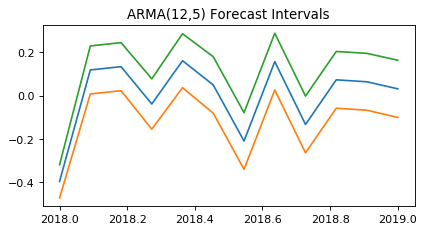

In [196]:
figure(figsize=(6,3),dpi=80)
plt.plot(timeVector_test, np.array([fcnew[0], up, down]).T)
plt.title('ARMA(12,5) Forecast Intervals')

## Seasonal Dummies

In [197]:
s = pd.Series(list('nabcdefghilm'))
D = pd.get_dummies(s)

In [198]:
betaD = result1.params[:-1]
betaLag = result1.params[-1]

In [199]:
fcD = []
for i in range(12):
    if i == 0:
        fcD.append(alcTrain[-1]*betaLag+np.matmul(np.array([betaD]), np.array([D.iloc[0]]).T))
    else:
        fcD.append(fcD[i-1]*betaLag+np.matmul(np.array([betaD]), np.array([D.iloc[i]]).T))

Text(0.5, 1.0, 'actual VS Seasonal Dummies')

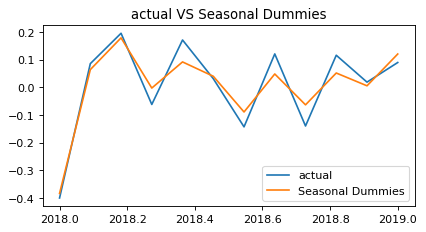

In [200]:
figure(figsize=(6,3),dpi=80)
plt.plot(timeVector_test, np.array([alcTest, fcD]).T)
plt.legend(['actual','Seasonal Dummies'])
plt.title('actual VS Seasonal Dummies')

In [201]:
li = [i for i in zip(*zip(*zip((*fcD))))]
fcDu = []
for i in range(12):
    fcDu.append(li[0][i].tolist())
new = list(zip(*fcDu))
fcD = pd.Series(new[0])

In [202]:
rmseD = np.sqrt(np.mean(np.sum((fcD-alcTest)**2)))

In [203]:
rmseD

0.1734557467210499

## Forecast evaluation

In [204]:
d_eHat = (fcD-alcTest)**2 - (fcAR125-alcTest)**2

In [205]:
test = sm.regression.linear_model.OLS(d_eHat, np.ones(12)).fit()

In [206]:
test.tvalues

const    1.006721
dtype: float64

In [207]:
d_eHat1 = (fcVAR-alcTest)**2 - (fcAR125-alcTest)**2

In [208]:
test2 = sm.regression.linear_model.OLS(d_eHat1, np.ones(12)).fit()

In [209]:
test2.tvalues

const    1.767814
dtype: float64

## Forecast Combination

In [210]:
# combine Dummy and VAR
w = 0.5
fcC1 = w*fcD + (1-w)*fcVAR

In [211]:
rmseC1 = np.sqrt(np.mean(np.sum((fcC1-alcTest)**2)))
rmseC1

0.35122171605835006

In [212]:
# combine Dummy and ARMA(12,5)
fcC2 = w*fcD + (1-w)*fcAR125

In [213]:
rmseC2 = np.sqrt(np.mean(np.sum((fcC2-alcTest)**2)))
rmseC2

0.10452142926309764

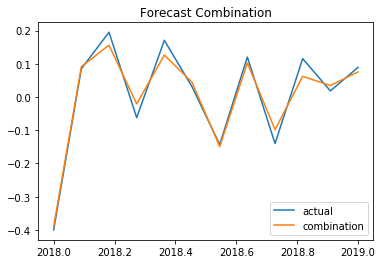

In [214]:
plt.plot(timeVector_test, np.array([alcTest, fcC2]).T)
plt.title('Forecast Combination')
plt.legend(['actual', 'combination'])

In [215]:
w = 0.3
fcC4 = w*fcD + (1-w)*fcAR125

In [216]:
rmseC4 = np.sqrt(np.mean(np.sum((fcC4-alcTest)**2)))
rmseC4

0.10412156231316405

In [217]:
# combine Dummy and ARMA(12,5) and VAR
w1 = 1/3
w2 = 1/3
fcC3 = w1*fcD + w2*fcAR125 + (1-w1-w2)*fcVAR

In [218]:
rmseC3 = np.sqrt(np.mean(np.sum((fcC3-alcTest)**2)))
rmseC3

0.24161042111500056